### Standardisation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
274,15692819,Female,57,26000,1
219,15732987,Male,59,143000,1
198,15745083,Male,26,80000,0
374,15793890,Female,37,80000,0
337,15612465,Male,35,79000,0


In [ ]:
# data processing
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
157,29,75000,0
0,19,19000,0
385,56,60000,1
398,36,33000,0
238,46,82000,0


it is recommended to first perform train test split for feature scaling (standardisation , normalisation)

In [ ]:
from sklearn.model_selection import train_test_split


In pandas, when you specify axis=1, you are referring to operations that should be performed column-wise. Conversely, axis=0 refers to row-wise operations.

In [ ]:
df.drop('Purchased', axis=1)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


70% train, 30% test

In [ ]:
(70*400)/100


280.0

In [ ]:
train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

[     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 216   49            65000
 259   45           131000
 49    31            89000
 238   46            82000
 343   47            51000
 
 [120 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64,
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 216    0
 259    1
 49     0
 238    0
 343    1
 Name: Purchased, Length: 120, dt

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(280, 2)

In [ ]:
X_test.shape

(120, 2)

**Standard Scaler**

**we make it learn by fitting the x_train, which means we pass 2 columns (age,salary) it learns how the values are and it does 2 things :
1. finding the mean of both age and salary and store in scaler object
2. finding the standard deviation of both age and salary and stores in scaler object

In [ ]:
from sklearn.preprocessing import StandardScaler
# make an object of this class
scaler = StandardScaler()
# fit the scaler to the train set and it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
scaler.scale_

array([1.01999375e+01, 3.45792870e+04])

remember : it learns only from X_train but transforms both X_train and X_test

In [ ]:
X_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [ ]:
# test set val 1 transformation
(30-3.78642857e+01)/1.01999375e+01

-0.7710131263059212

In [ ]:
# test set val 2 transformation
(38-3.78642857e+01)/1.01999375e+01

0.013305405057628686

In [ ]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

problem in standard scaler is that when we pass the training set (X_train) it is a dataframe -> but it returns a numpy array

so convert it into a dataframe

In [ ]:
X_train.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

since it is a numpy array it doesnt have column names we pass it from X_train

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
X_test.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:

X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
# round the values to 1 decimal place
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [ ]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


original mean and standard deviation

In [ ]:
# round the values to 1 decimal place
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


after transformation

In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


we can see that mean=0, sd=1

#### EFFECTS OF SCALING

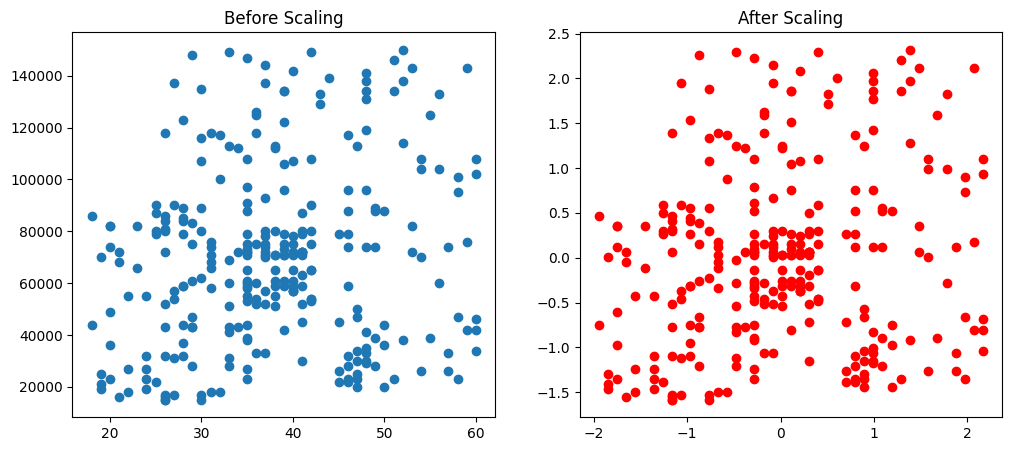

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

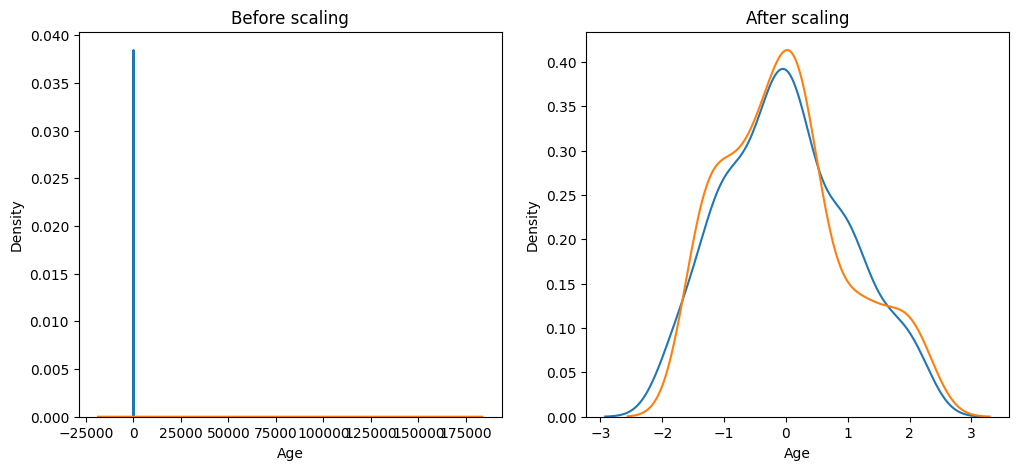

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

we can see that after scaling age and salary are comparable making it efficient to provide it into ml algo yielding better performance

**Comparision of Distributions**

age

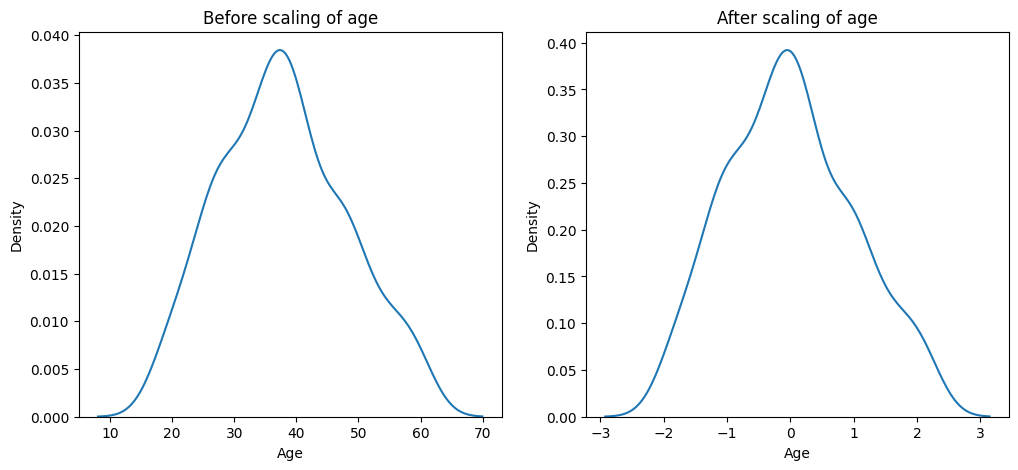

In [ ]:
# before scaling of age
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling of age')
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling of age
ax2.set_title('After scaling of age')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

**salary**

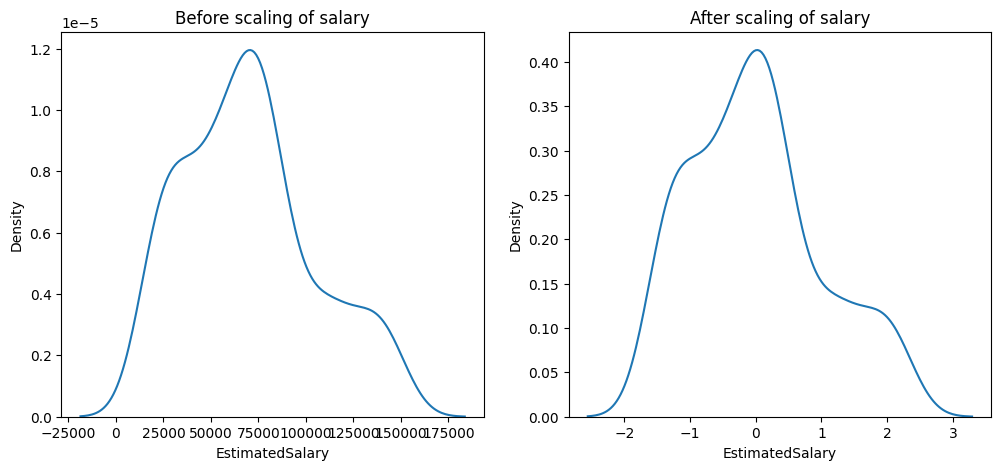

In [ ]:
# before scaling of age
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling of salary')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling of age
ax2.set_title('After scaling of salary')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

we can see that distribution remains the same i.e the data remains the same, only the scale changes

shape of the distribution remains intact, just scale changes
mean becomes 0, standard deviation becomes 1

**Scaling is very important in Logistic regression**

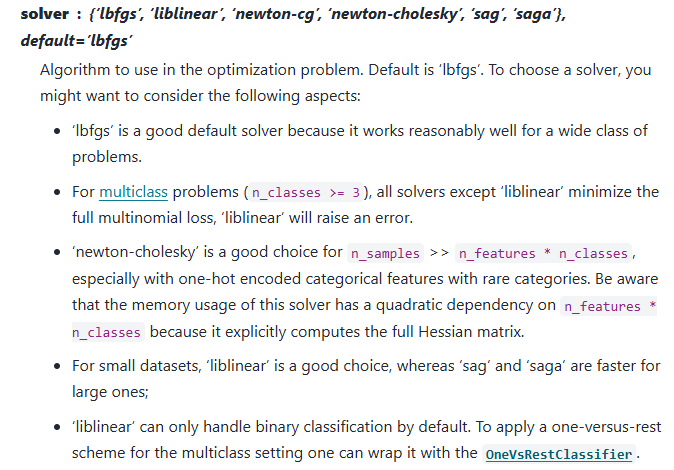

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

class sklearn.linear_model.LogisticRegression(penalty='deprecated', *, C=1.0, l1_ratio=0.0, dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, verbose=0, warm_start=False, n_jobs=None)

default solver : 'lbfgs'

for smaller datasets use liblinear

In [ ]:
# for smaller datasets use liblinear

In [ ]:
from sklearn.linear_model import LogisticRegression

# create 2 objects,one for unscaled the other for scaled.
lr_not_scaled = LogisticRegression(solver='liblinear')
lr_scaled = LogisticRegression(solver='liblinear')

In [ ]:
# train the first object on unscaled values
lr_not_scaled.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# train the second object on scaled values
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_not_scaled = lr_not_scaled.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score without scaling", accuracy_score(y_test,y_pred_not_scaled))

Accuracy score without scaling 0.6583333333333333


In [ ]:
print("Accuracy score with scaling",accuracy_score(y_test,y_pred_scaled))

Accuracy score with scaling 0.875


There is no impact of scaling on Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_not_scaled = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt_not_scaled.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_not_scaled = dt_not_scaled.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
print("Accuracy score of dt without scaling",accuracy_score(y_test,y_pred_not_scaled))
print("Accuaracy score of dt with scaling", accuracy_score(y_test,y_pred_scaled))

Accuracy score of dt without scaling 0.875
Accuaracy score of dt with scaling 0.875


we can see that scaling has no impact on decision tree

In [ ]:
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
extra_df = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
new_df = pd.concat([df,extra_df],ignore_index=True)
new_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


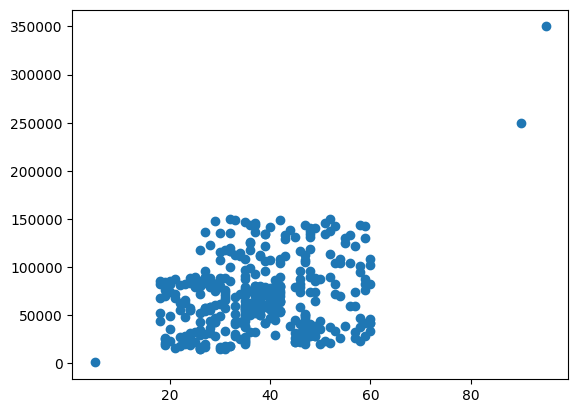

In [ ]:
plt.scatter(new_df['Age'],new_df['EstimatedSalary'])

##### let us see if there is any impact on outliers ?

In [ ]:
# use new_df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


extra points (2 - in train, 1 -in test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('Purchased',axis=1),new_df['Purchased'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(282, 2)

In [ ]:
X_test.shape

(121, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# train to find mean,standard deviation of both the input columns (age,salary)
# learn from the training data, transform both train and test data
# gives original mean and sd of age,salary
scaler.fit(X_train)

StandardScaler()

In [ ]:
# transform X_train
X_train_scaled = scaler.transform(X_train)

In [ ]:
# transform X_test
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

[]

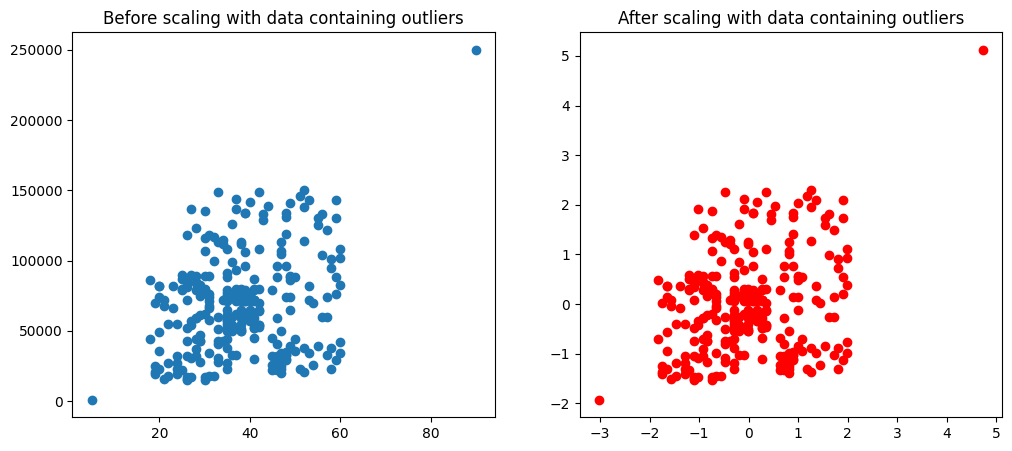

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scaling
ax1.set_title('Before scaling with data containing outliers')
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])

ax2.set_title('After scaling with data containing outliers')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.plot()